# Data Science Assignment

# Task 2: Movie Rating Prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
import tensorflow as tf

## Load the dataset

In [56]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Movie_Prediction\IMDb_Movies_India.csv", encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data Cleaning

In [59]:
df.shape

(15509, 10)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [63]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [67]:
df.dropna(inplace=True)

In [69]:
df.drop_duplicates(inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [73]:
# Convert into the correct data types
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [75]:
df.dtypes

Name         object
Year          int32
Duration      int64
Genre        object
Rating      float64
Votes         int64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

## Exploratory data analysis

In [145]:
df.describe(include='all')

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
count,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
unique,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,844,NaN,NaN,41,104,52,57,NaN,NaN,NaN,NaN,NaN
mean,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN,5.898533,5.898533,5.898533,5.898533,5.898533
std,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN,0.593862,1.118306,1.037218,1.060753,1.072170
min,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN,2.400000,1.600000,1.400000,1.600000,1.700000
25%,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN,5.516505,5.226829,5.322857,5.281818,5.300000
50%,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN,5.893878,6.000000,5.945652,5.975000,5.969231
75%,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN,6.415521,6.700000,6.588889,6.600000,6.575000


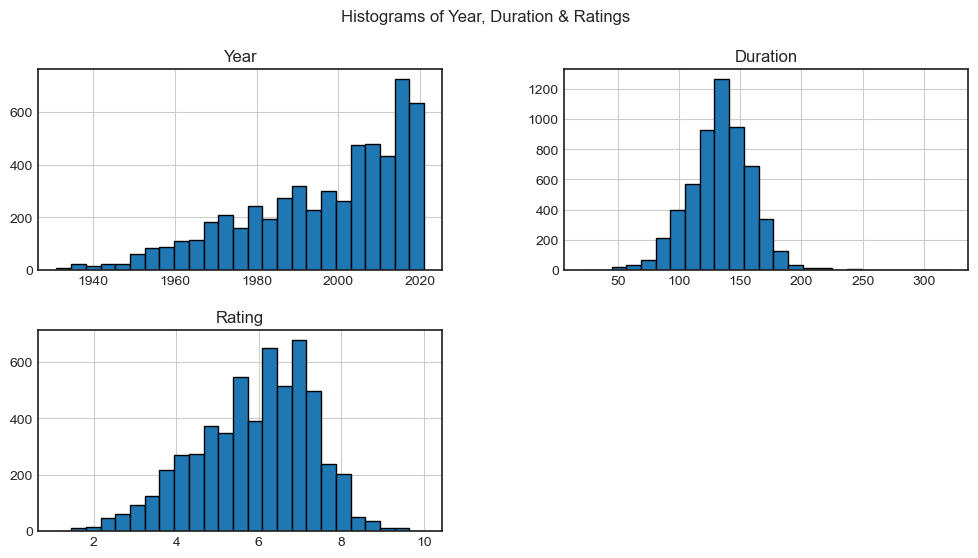

In [86]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration','Rating']].hist(bins=25, edgecolor='black',figsize=(12, 6))
plt.suptitle('Histograms of Year, Duration & Ratings ')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2896\929813214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


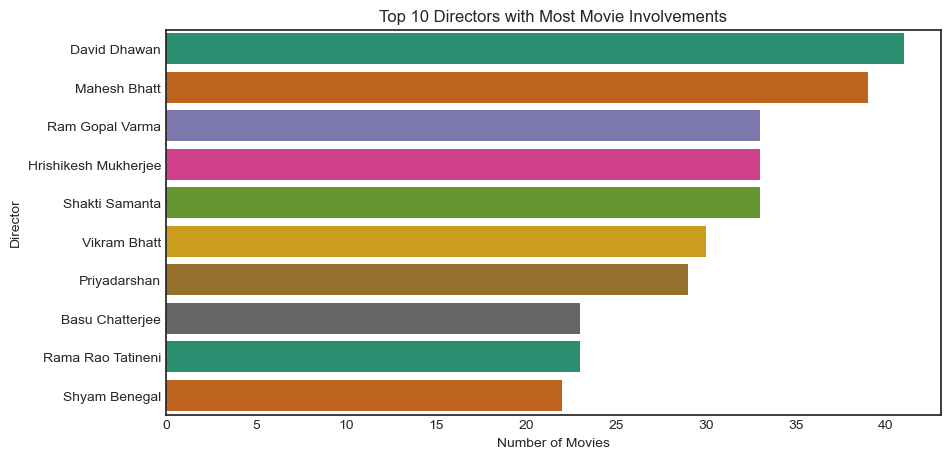

In [88]:
top_10_directors = df['Director'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2896\3927813449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


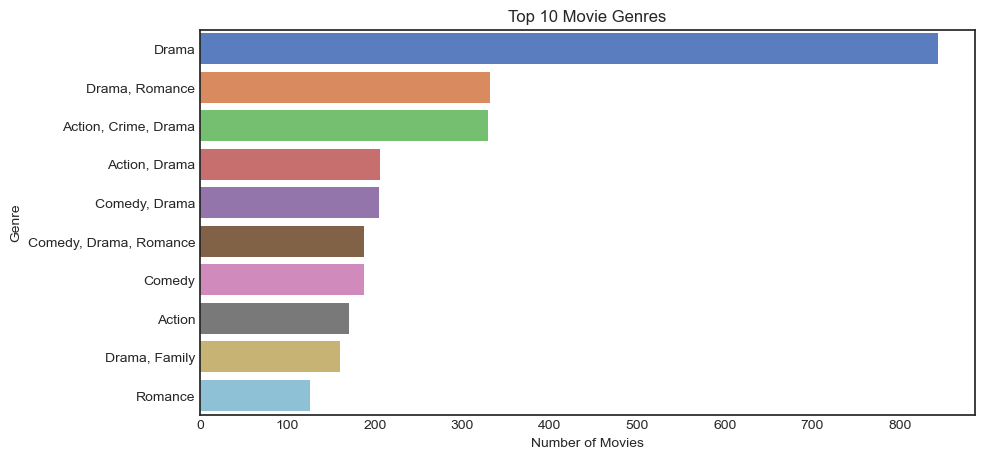

In [90]:
top_10_genres = df['Genre'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [178]:
# Combine the three actor columns into one Series
combined_actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])

# Display the top 10 actors
top_10_actors = combined_actors.value_counts().head(10)
top_10_actors

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2896\2079350178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')


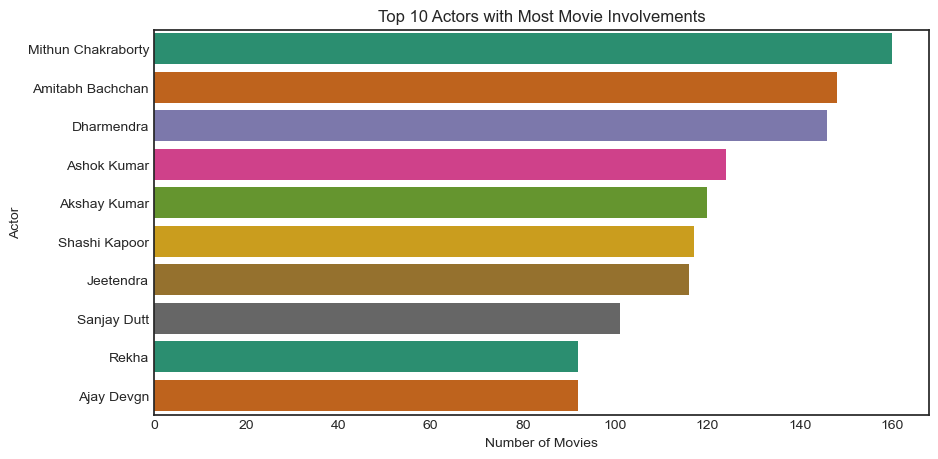

In [180]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

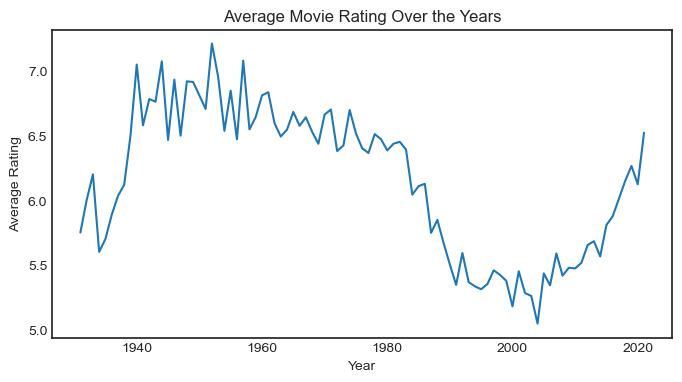

In [182]:
# Calculate the average rating for each year
average_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(False)
plt.show()

In [100]:
# High rated movie details
high_rating_movies = df[df['Rating'] > 8.5]
high_rating_movies

# Group by Rating and get the count of movies which have higher than rating value 8.5 
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
10,10.0,1
9,9.7,1
8,9.4,3
7,9.3,7
6,9.2,2
5,9.1,4
4,9.0,5
3,8.9,5
2,8.8,6
1,8.7,8


<Axes: >

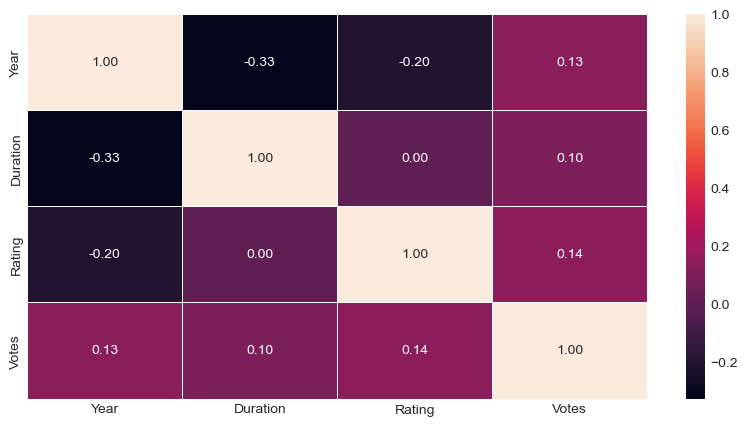

In [104]:
#Relationship between numeric variables
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, fmt=".2f", linewidth=0.5)

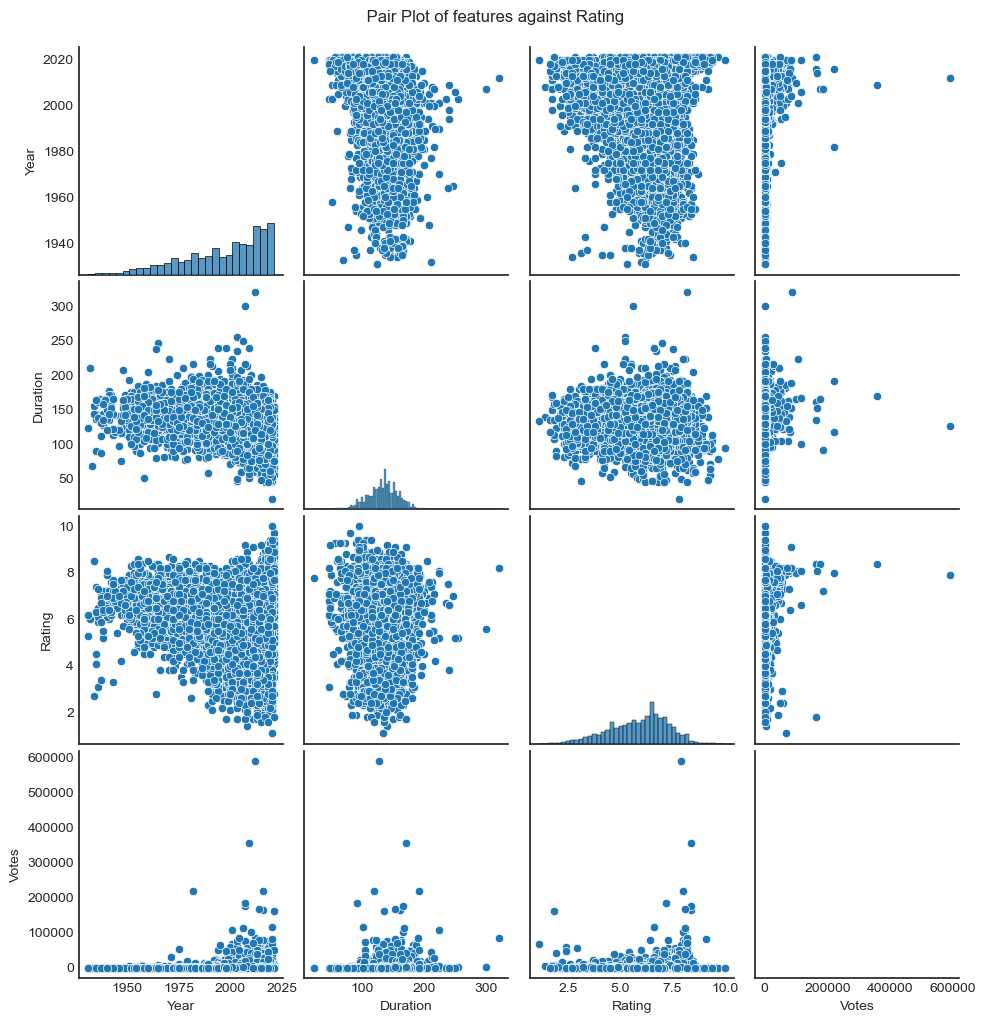

In [106]:
sns.pairplot(new_df,diag_kind='auto')
plt.suptitle(' Pair Plot of features against Rating', y=1.02)
plt.show()

In [108]:
df= df.drop('Name',axis=1)

In [110]:
# Create new features 

Genre_Average_Rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_Average_Rating'] =Actor3_Average_Rating

df

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


## Data Splitting

In [113]:
# Define feature and target variables
x= df[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=df['Rating']

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state= 1 )

In [118]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
8901,2019,3146,152,5.266355,3.875000,5.185714,5.433333,2.900000,3.6
3288,2018,257,140,6.032692,6.650000,5.100000,5.100000,5.950000,5.1
15288,2019,500,92,5.640642,5.850000,8.600000,8.600000,8.600000,8.6
62,2019,361,126,5.800000,6.100000,6.550000,6.100000,6.557143,6.1
6926,1983,75,156,4.733333,5.625000,5.408989,6.279167,4.800000,5.6
...,...,...,...,...,...,...,...,...,...
2359,1980,17,131,6.415521,6.782353,5.440000,6.600000,6.000000,6.0
14284,2014,17169,129,5.743465,6.133333,5.828571,5.955556,5.130769,6.5
10787,2017,24,134,5.295238,4.975000,5.350000,5.360000,6.360000,7.2
522,1966,109,170,6.287500,6.400000,6.784615,6.286842,6.841667,6.6


In [120]:
from sklearn.tree import DecisionTreeRegressor

fitted_model_dt = DecisionTreeRegressor()
fitted_model_dt.fit(x_train, y_train)
y_pred_dt = fitted_model_dt.predict(x_test)

In [122]:
from sklearn.svm import SVR

fitted_model_svr = SVR()
fitted_model_svr.fit(x_train, y_train)
y_pred_svr = fitted_model_svr.predict(x_test)

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

fitted_model_gb = GradientBoostingRegressor()
fitted_model_gb.fit(x_train, y_train)
y_pred_gb = fitted_model_gb.predict(x_test)

In [126]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE_dt =  mean_squared_error(y_test, y_pred_dt) 
MAE_dt = mean_absolute_error(y_test, y_pred_dt)
R2_Score_dt = r2_score(y_test, y_pred_dt)

print('   Performance Evaluation for DecisionTreeRegressor Model: ')
print('Mean squared error value is: ', MSE_dt)
print('Mean absolute error value is: ', MAE_dt)
print('R2 score value is: ', R2_Score_dt)

MSE_svr =  mean_squared_error(y_test, y_pred_svr) 
MAE_svr = mean_absolute_error(y_test, y_pred_svr)
R2_Score_svr = r2_score(y_test, y_pred_svr)

print('\n   Performance Evaluation for SVR Model: ')
print('Mean squared error value is: ', MSE_svr)
print('Mean absolute error value is: ', MAE_svr)
print('R2 score value is: ', R2_Score_svr)

MSE_gb =  mean_squared_error(y_test, y_pred_gb) 
MAE_gb = mean_absolute_error(y_test, y_pred_gb)
R2_Score_gb = r2_score(y_test, y_pred_gb)

print('\n   Performance Evaluation for GB Model: ')
print('Mean squared error value is: ', MSE_gb)
print('Mean absolute error value is: ', MAE_gb)
print('R2 score value is: ', R2_Score_gb)

   Performance Evaluation for DecisionTreeRegressor Model: 
Mean squared error value is:  0.7173674911660778
Mean absolute error value is:  0.5662544169611308
R2 score value is:  0.6121564811098745

   Performance Evaluation for SVR Model: 
Mean squared error value is:  1.8107450744107187
Mean absolute error value is:  1.0535464732802036
R2 score value is:  0.021023742892429254

   Performance Evaluation for GB Model: 
Mean squared error value is:  0.3788870558837424
Mean absolute error value is:  0.43706560514319964
R2 score value is:  0.7951553550649397


The coefficient of the determination or the R2 score value of Gradient Boost model is 0.795 which greater than SVR Regression model & Decision Tree Regression model and it means about 79.5% of the variance in the target variable(Rating) is strongly explained by the model.

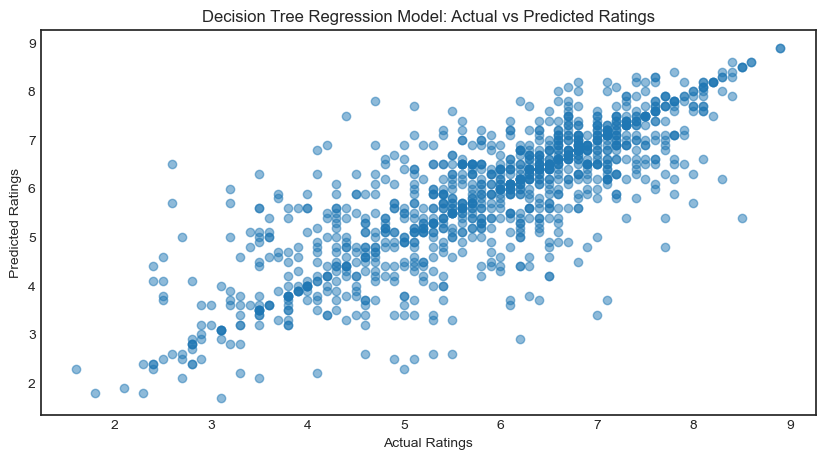

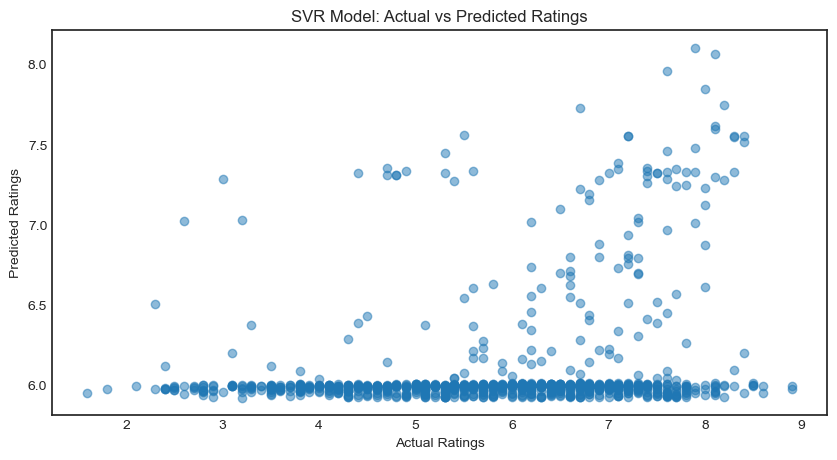

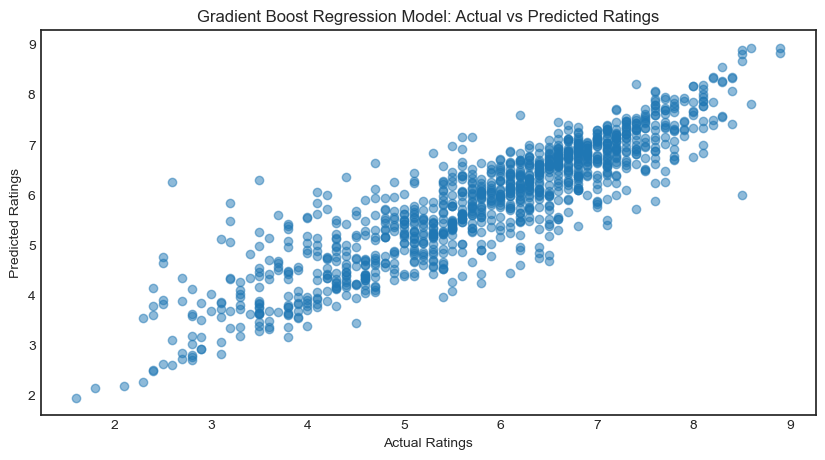

In [129]:
# Scatter plot for Decision Tree Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for SVR model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.title('SVR Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Scatter plot for Gradient Boost Regression model predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.title('Gradient Boost Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [160]:
data = {'Year': [2018], 'Votes': [100] ,'Duration': [130], 'Genre_Average_Rating':[6.0],'Director_Average_Rating':[6.5],'Actor1_Average_Rating':[5.5],'Actor2_Average_Rating':[5.8],'Actor3_Average_Rating':[5.3]}
trail_data = pd.DataFrame(data)

In [158]:
trail_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,2018,100,130,6.0,6.5,5.5,5.8,5.3


In [150]:
# Predict rating using trial data
predict_rating = fitted_model_gb.predict(trail_data)
print('Predicted Rating for trial data: ',predict_rating[0])

Predicted Rating for trial data:  5.667351892478533


In [162]:
predict_rating = fitted_model_gb.predict(x_test)

In [164]:
predict_rating

array([4.33023169, 6.52271425, 5.44950179, ..., 5.4464119 , 4.34470552,
       7.16526932])

In [184]:
import pickle

# Save the trained model
with open("Movie_rating_prediction_model.pkl", "wb") as file:
    pickle.dump(fitted_model_gb, file)  # Save the model itself, not `predict()`

# Load the model
with open("Movie_rating_prediction_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
predictions = loaded_model.predict(x_test)  # Replace X_test with your test data
print(predictions)

[4.33023169 6.52271425 5.44950179 ... 5.4464119  4.34470552 7.16526932]


In [186]:
with open("Movie_rating_prediction_model.pkl", "rb") as file:
    data = pickle.load(file)

In [188]:
data

GradientBoostingRegressor()

In [190]:
print(data)

GradientBoostingRegressor()


In [194]:
predictions = data.predict(x_test)

In [196]:
predictions

array([4.33023169, 6.52271425, 5.44950179, ..., 5.4464119 , 4.34470552,
       7.16526932])